In [1]:
import warnings 
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.


En particular la regresión Lasso es interpretable:

Mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
La regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [3]:
X = pd.read_csv('X_openingg.csv')


y = X['worldwide_gross']

X = X.drop('worldwide_gross', axis=1)

In [4]:
from sklearn.linear_model import Lasso

model = Lasso()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
#cuanto usamos de train (random, sin parametrizar)

len(X_train)/len(X)

0.74966231427285

In [7]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
model.score(X_test, y_test)

0.782534883821093

In [9]:
#nos da los parámetros de una regresión líneal. recuerden que una rl toma las features multiplica x parametros luego hace una suma.
model.coef_

array([ 1.73068682e+00,  4.32233581e+05, -4.41668184e+07,  1.70418922e+05,
       -3.10733112e+02, -5.62086555e-02,  2.42616132e+07,  5.30147412e+00,
       -1.44666799e+04])

In [10]:
#voy a oscupar el log en base 10 de numpy para ver los valores absolutos (ni - ni +) para verlos en orden de magnitud

var = np.floor(np.log10(np.abs(model.coef_)))


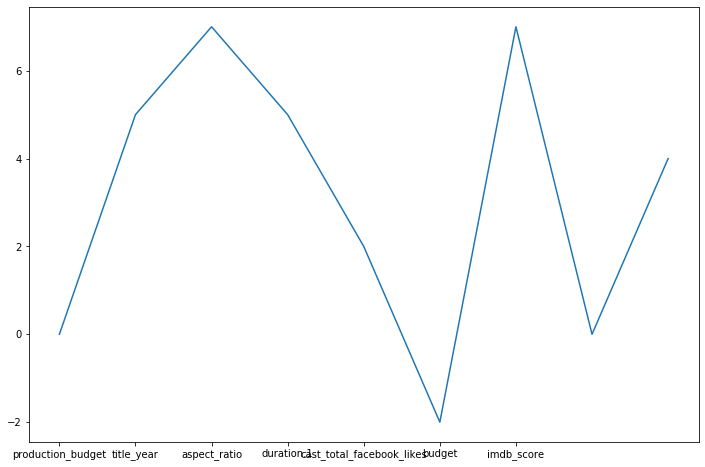

In [11]:
#vamos a plotear para ver las variables con mayor magnitud y elegir cual de las features son más importantes (bajar la dimensionalidad)

plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));


Esto nos guía a guardar únicamente:

production_budget
title_year
duration
cast_total_facebook_likes
imdb_score

Correlación entre variables. 

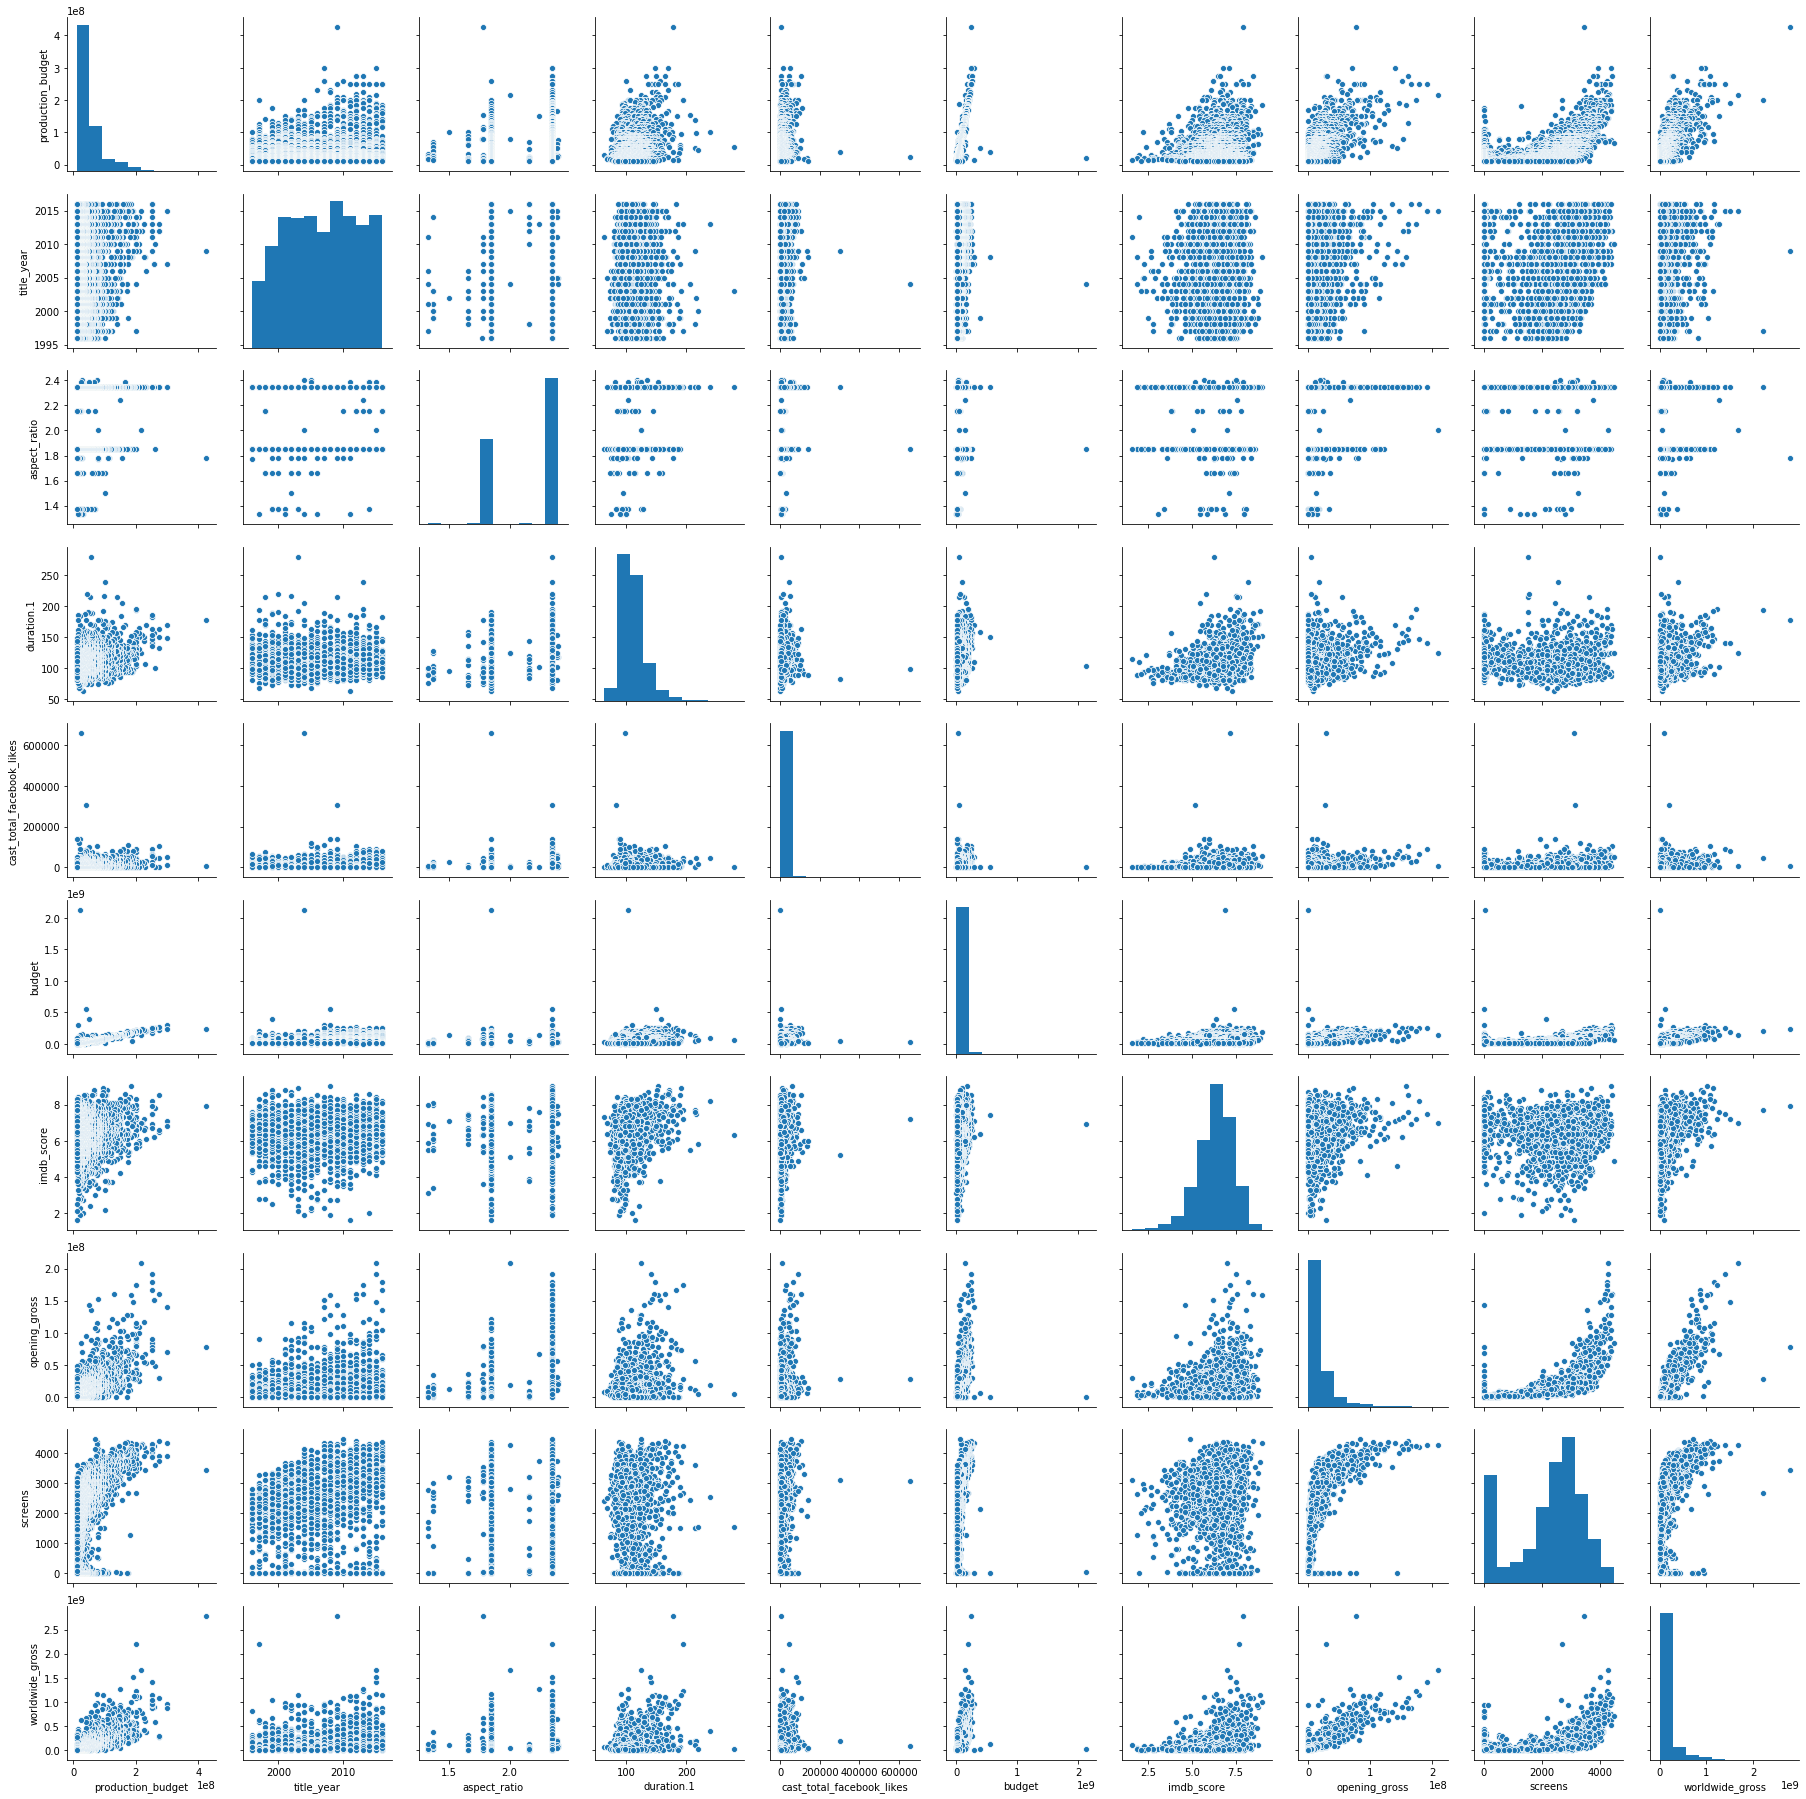

In [12]:
import seaborn as sns

Z = pd.concat([X,y], axis=1)

sns.pairplot(Z)

In [13]:
Z.head(10)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens,worldwide_gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0,2.783919e+09
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0,9.634204e+08
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0,8.796209e+08
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0,1.084439e+09
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0,2.600021e+08
5,275000000.0,2012.0,2.35,132.0,1873.0,263700000.0,6.6,30180188.0,3749.0,2.827781e+08
6,260000000.0,2010.0,1.85,100.0,2036.0,260000000.0,7.8,48767052.0,3603.0,5.865819e+08
7,258000000.0,2007.0,2.35,156.0,46055.0,258000000.0,6.2,151116516.0,4252.0,8.908753e+08
8,258000000.0,2007.0,2.35,156.0,46055.0,258000000.0,6.2,151116516.0,4252.0,8.908753e+08
9,250000000.0,2015.0,2.35,141.0,92000.0,250000000.0,7.5,191271109.0,4276.0,1.404706e+09


In [14]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X, clase], axis=1)

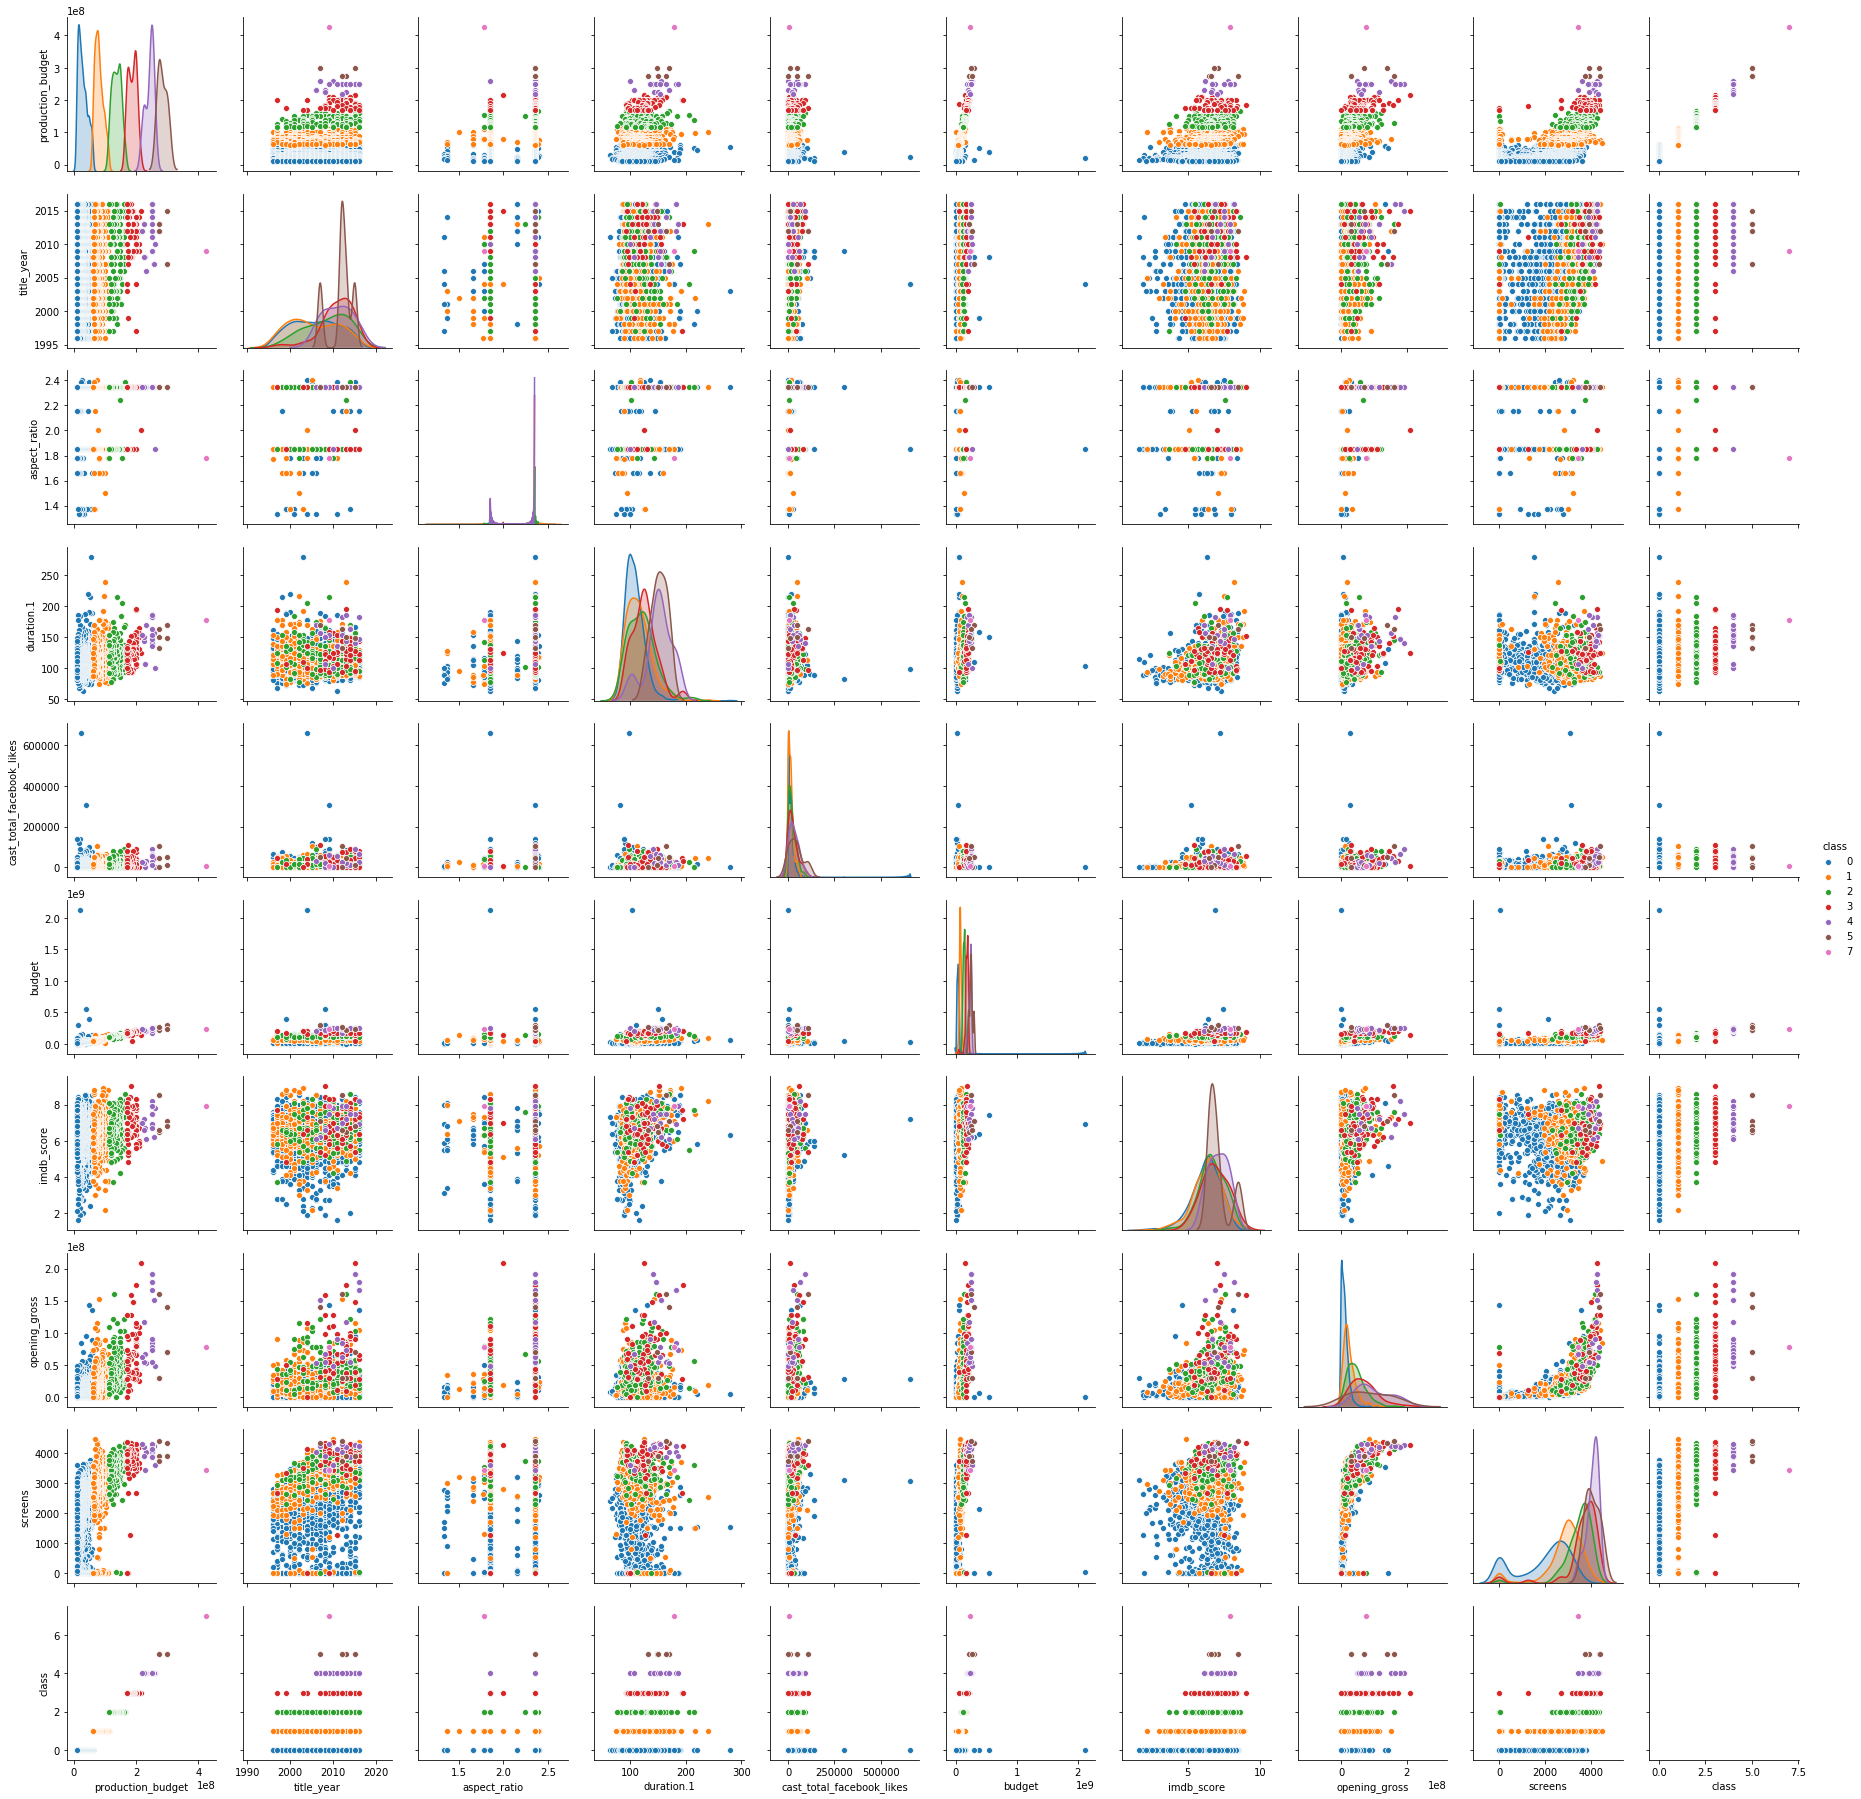

In [15]:
sns.pairplot(Z2, hue='class')

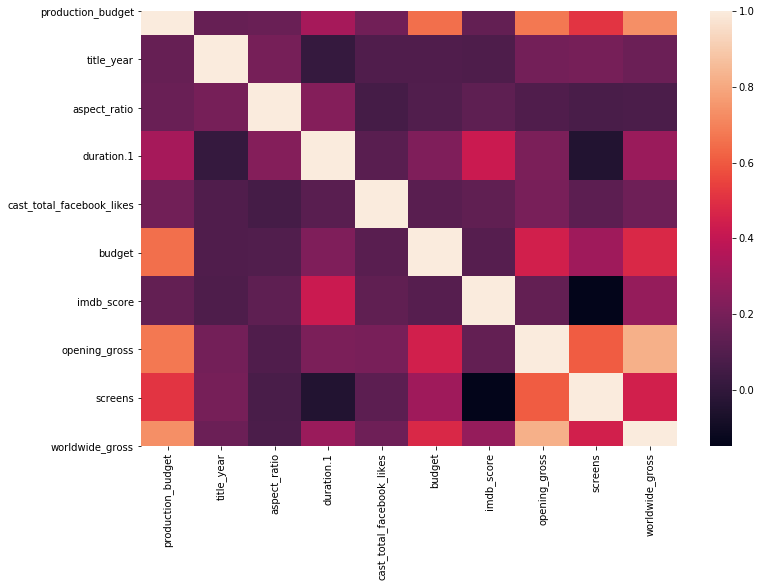

In [16]:
#acá me interesa la última columna: la variable de respuesta (y) tiene una gran correlación con el budget; con duración, con ibm score, opening gross, screens.
#observamos que tiene mas peso "production_budget" que "budget" por lo tanto esta ultima voy a borrar.
Z3= pd.concat([X,y], axis=1)
sns.heatmap(Z3.corr())

Metodos de selección automatica de features
Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection

In [17]:
#SelectKBest hace un analisis univariado, cada feature es analizada y se ve que tanta información aporta para luego elegir las K mejores.
#SelectKBest elige las features que mas info aportan pero necesita una metrica que es mutual_info_regression 
#hay que elegir una metrica que sirva para el problema en este caso para regresión y no clasificación

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000002121D825A68>)

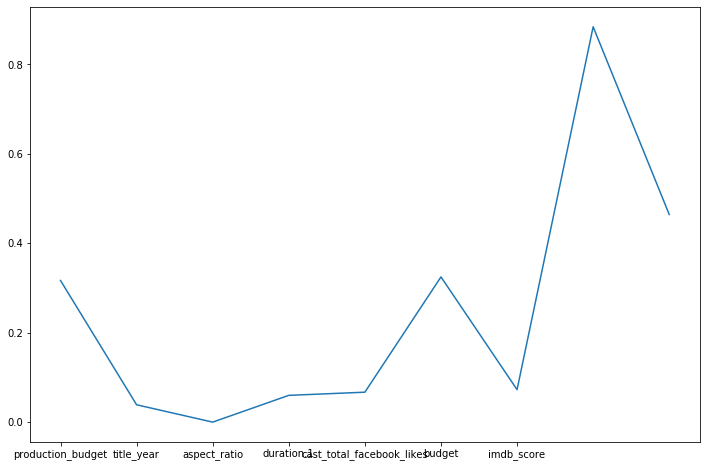

In [18]:
scores = selector.scores_

plt.rcParams["figure.figsize"] = [12,8]  #para que mi grafico sea mas grande
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));  #configuro la leyenda y los levels (ejes) para ver a que feature se indica cada punto

Del analisis univariante obtenemos que las mejores features son:

production_budget

cast_total_facebook_likes

budget

Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso. 
Y las 3 features que salieron en la regresión lasso y en el analisis univariante: 

In [26]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

Veamos los resultados del modelo con estas features

In [27]:
cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [29]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, y_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

0.6433882722744132
0.5117200188669984
0.5130692102456065


Que podemos deducir de esto? No nos fue tan util reducir la dimensión. Recuerden que el Machine Learning es muy iterativo, hay que probar varios metodos de ataque. Nuestra unica forma de saber si las cosas estan andando es entrenar un modelo y viendo sus resultados. La explicacion de esto es que partí con 7 features, que no es mucho (no tenia un problema de la maldición de la dimensión). En caso de tener 50 features esto si puede ser muy útil. 